# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Abdullah-Al-Raihan Nayeem </font>

# Introduction

The objective of this assignment is to implement and apply linear regression model. As we have already chosen a data set for regression in our first assignment, here, we present the primary impression about the data again and prepare the data to apply linear regression model on it. To do so, two of the regression algorithm discussed in the class is implemented according to the structure given. After passing the priliminary test, few expermient has been made on the chosen database to compare the results between two algorithms and measure the significance of different features in it.  

# III. Data

## A. Data for Regression
For regression analysis, black friday dataset from kaggle has been chosen. Based on the features it has, like age group of customers, hierarchical product category and amount spent, this dataset is a decent one to apply regression analysis to find purchase trend. Key attributes in this dataset and their details are given below:

- PRODUCT_ID: unique identifier for the products.
- Gender: Gender of the customers.
- Age: Age group of the customers.
- Occupation: occupation of the customers.
- City_Category: Purchase has been made from which city
- Stay_In_Current_City: For how long the customer has been in that city
- Marital_Status: Customer's marital status.
- Product_Category: 3 Level hierarchical product category
- Purchase: Amount of purchase

### Reading Data
The dataset has been read from a csv formatted file as pandas data frame.

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('BlackFriday.csv')

### Preprocessing Data

In [4]:
df.Product_Category_3 = df.Product_Category_3.fillna(0)
df.Product_Category_2 = df.Product_Category_2.fillna(0)
df.loc[df.Stay_In_Current_City_Years == '4+', 'Stay_In_Current_City_Years'] = 4

In data pre processing, null product categories are replaced with 0. To quantify the data appropriately, people live in city more than 4 years are rounded off to 4 years.

### Visualizing the data

In [5]:
age_group = df.groupby(["Gender", "Age"], as_index=True)
rdf = age_group['Purchase'].sum()

group_data = rdf.to_dict()
group_levels = rdf.index.levels
gender_groups = group_levels[0]
age_groups = group_levels[1]
chart_data = {g: [] for g in gender_groups}

for g1_index in range(len(gender_groups)):
    for g2_index in range(len(age_groups)):
        group_key = (gender_groups[g1_index], age_groups[g2_index])
        chart_data[gender_groups[g1_index]].append(group_data[group_key]/1000000)


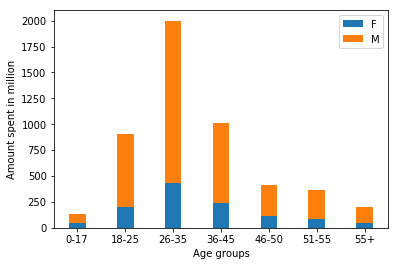

In [644]:
bar_count = len(age_groups)
index = np.arange(bar_count)
bar_width = 0.35

b1 = plt.bar(index, chart_data['F'], bar_width)
b2 = plt.bar(index, chart_data['M'], bar_width, bottom=chart_data['F'])
plt.ylabel('Amount spent in million')
plt.xlabel('Age groups')
plt.xticks(index, age_groups)
plt.legend((b1[0], b2[0]), gender_groups)
plt.show()

In the above stacked bar chart, we can see that, people in age group 26-35 make the most amount of purchase during black friday and mostly men. This insight can help seller to set focus product and take marketing technique accordingly.

In [6]:
city_group = df.groupby(['City_Category', 'Stay_In_Current_City_Years'])
rdf = city_group['Purchase'].sum()

group_data = rdf.to_dict()
group_levels = rdf.index.levels
city_groups = group_levels[0]
stay_in_current_city_groups = group_levels[1]
chart_data = {g: [] for g in city_groups}

for g1_index in range(len(city_groups)):
    for g2_index in range(len(stay_in_current_city_groups)):
        group_key = (city_groups[g1_index], stay_in_current_city_groups[g2_index])
        chart_data[city_groups[g1_index]].append(group_data[group_key]/1000000)

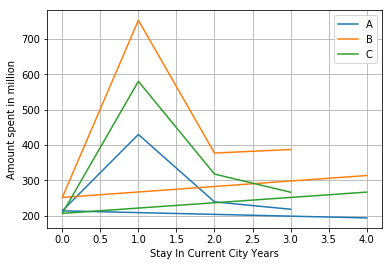

In [7]:
y = chart_data['A']
x = stay_in_current_city_groups
city_a = plt.plot(x, y)

y = chart_data['B']
city_b = plt.plot(x, y)

y = chart_data['C']
city_c = plt.plot(x, y)

plt.grid(True)
plt.xlabel('Stay In Current City Years')
plt.ylabel('Amount spent in million')
plt.legend((city_a[0], city_b[0], city_c[0]), city_groups)

This line charts shows that people who is living in a city for around 1 year tend to purhcase more than others. Here, we can imply that, at the first year people basically focus more on settling in and after 2-4 years people have most of the things they need. Given that, people living in a city for a year purhcase more that usual.

In [8]:
product_group = df.groupby('Product_Category_1')
rdf = product_group.sum()
sorted_rdf = rdf.sort_values(by='Purchase', ascending=False)['Purchase']

top_five = sorted_rdf.head(7)
remaining = rdf[rdf.index > 7]

product_categories_label = top_five.keys().tolist()
product_categories_label.append('Others')

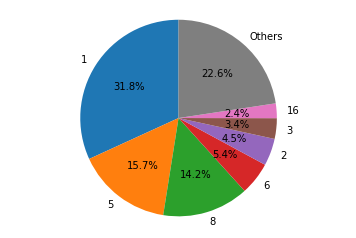

In [9]:
values = top_five.to_list()
values.append(remaining['Purchase'].sum())

labels = product_categories_label

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

So far, we have figured out which age group purchase most during black friday. Additionally, we have also figured out at what living condition people go for the purchase most of the time. To find out more about the purchase trend, above visualization presents people of which occupation make the most purchase.

# Method

In linear regression model, the goal is to find the regression line for which would provide target for a given input sample. The target value lies in the regression line could definitely have some fluctuation from the actual outcome. In this matter, we have implemented two algorithm to find the best fit regression line which means the line that causes smallest amount of error. Least square algorithm gets trained from the dataset and identify the weights for the regression line. On the other hand, least mean square (LMS) sequencially gets trained from the online data and eventually improves the error rate. 

In the code section below, linear model has been implemented. Since both the least square and LMS algorithms are based on linear model, therefore, both of these classes extends the `LinearModel` class which extends the `BaseModel`. For any model, there would be a functionality of training and later, using the model. In this case, least square and LMS have different approach for training. For linear model, the purpose of training is to find the weight for best fit line. Therefore, `LinearModel` class declares the `w` as none during initialization. In `LeastSquare` class `train` function takes both input and target values as parameter. Then adds a basis in the original input array and applies the formula to find weight in terms of input and target vector. Whereas, the use function takes only input vector applying the dot product with the previously calculated weight returns the target vector. Next, `LMS` class has `train` function that iteratively calls `train_step` which has incremental training model to find the weights for best fit regression line. `train` function basically sends `train_step` one sample at a time, to do the sequential training with predefined learning rate `self.alpha`. Therefore, even with one sample of data LMS can provide a regression line. It may not be close to the best fit although. After training, the use function of LMS is pretty much same as least square algorithm.

### Super Classs Definition

In [10]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [11]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        return self.add_ones(X) @ self.w


### Least Mean Squares

In [12]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        X1 = np.hstack((1, x))
        if self.w is None: 
            self.w=np.zeros((X1.shape[0],1))
        
        a=np.subtract(np.dot(self.w.T,X1),t)
        b=self.alpha*a*X1
        self.w=np.subtract(self.w.T, b.T).T
        

    # apply the current model to data X
    def use(self, X):
        X=self.add_ones(X)
        t=np.dot(self.w.T,X.T)
        return t.T

        

### Usage Examples

In [13]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

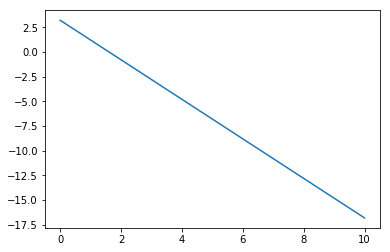

In [14]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)
plt.plot(ls.use(X))

In [15]:
print(T)

[[  3.2]
 [  1.2]
 [ -0.8]
 [ -2.8]
 [ -4.8]
 [ -6.8]
 [ -8.8]
 [-10.8]
 [-12.8]
 [-14.8]
 [-16.8]]


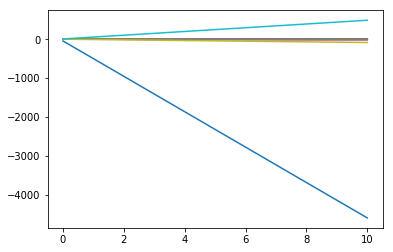

In [16]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

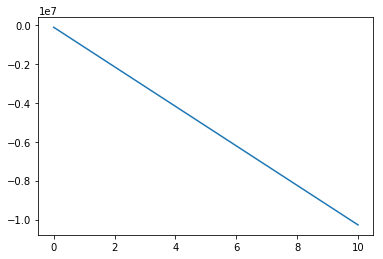

In [18]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


### Preparing data for regression
From the observations about the data above, we have noticed that age group has a significant impact on the purchase amount in black friday dataset. Since we have developed a model to find the impact using linear regression, we can apply the procedure to find out the impact. To do so, the data frame has been grouped by `Age` and calculated the sum of `Purchase` amount from the group. Then, the data has been structured to feed into the model.

In [19]:
age_group = df.groupby(["Age"], as_index=True)
rdf = age_group['Purchase'].sum()

group_data = rdf.to_dict()
dX = np.array
gData = {"Age": [], "Purchase": []}
replacement = {}

count = 1
for key in sorted(group_data.keys()):
    gData["Age"].append(key)
    replacement[key] = count
    count += 1
    gData["Purchase"].append(group_data[key])

data = pd.DataFrame.from_dict(gData)

In [20]:
data

Age    Purchase
0   0-17   132659006
1  18-25   901669280
2  26-35  1999749106
3  36-45  1010649565
4  46-50   413418223
5  51-55   361908356
6    55+   197614842

To find out the impact of `Age` on the `Purchase` amount, it has been considered as the input variable and amount of purchase has been considered as output variable. Since `Age` here is a categorical attribute, it has been temporarily replaced by a countinuous value.

In [21]:
print(replacement)
dX = np.array(data.Age.replace(replacement)).reshape((-1, 1))
dT = np.array(data.Purchase).reshape((-1, 1))

{'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}


### Analysis & Comparison

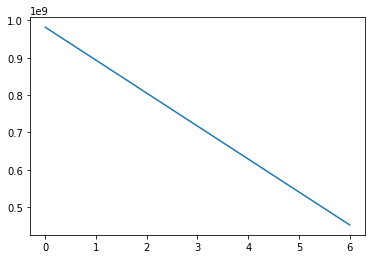

In [659]:
ls = LinearRegress()
ls.train(dX, dT)
ls_result = ls.use(dX)
plt.plot(ls_result)

From the least square linear regression model, it is observed that age group has a downward sloping impact on the purchase amount. Which means younger age groups tend to purchase more in terms of amount than the older people. This is somewhat we have observed in an earlier chart.

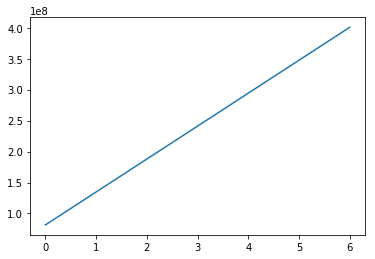

In [660]:
lms = LMS(0.01)
lms.train(dX, dT)
lms_result = lms.use(dX)
plt.plot(lms_result)

Applying the least mean square algorithm, a different scenario is observed. The data that we are using is a grouped data where least square resultsome what makes sense. In this case, it shows completely a different story. The lack of training data tend make this model confused and does match with what we perceived from the chart and regression result above. 

To provide more sample for training, the model has been trained without any grouping of age and purchase data. Let's see if that makes any difference in the result.

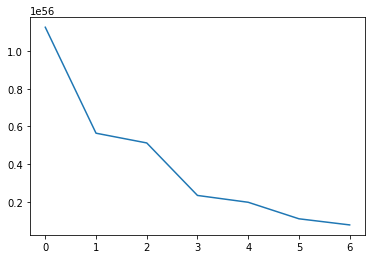

In [661]:
lms = LMS(0.01)
lms.train(
    np.array(df.Age.value_counts()).reshape((-1, 1)),
    np.array(df.Purchase).reshape((-1, 1))
)

lms_scatter_result = lms.use(np.array(df.Age.value_counts()).reshape((-1, 1)) )
plt.plot(lms_scatter_result)

Keeping the learning rate same, the training samples have been changed and now we can see a different result. It reflects the result we can see from the above regression and visualization.

Now to compare between the algorithms, root mean square error can be checked.

In [616]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

In [619]:
rmse(dT, lms_scatter_result)

1.4007707477472026e+56

In [577]:
rmse(dT, lms_result)

2126323407.134724

In [557]:
rmse(dT, ls_result)

1541811270.6634579

For this experiment, least square linear regression seems to perform better than LMS.

# Conclusions
In this assignment, linear model has been implemented and model comparison has been presented.
One of the new learnings are preparing data to feed in the regression model. Another important part is to compare the algorithms using RMSE.

# References
1. Dagdoug, M. (2018, July 25). Black Friday. Retrieved January 28, 2019, from https://www.kaggle.com/mehdidag/black-friday

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [414]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
